In [24]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [25]:
df_DA = df[df['job_title_short'] == 'Data Scientist'].copy()

In [ ]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot.drop('Total', inplace=True)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


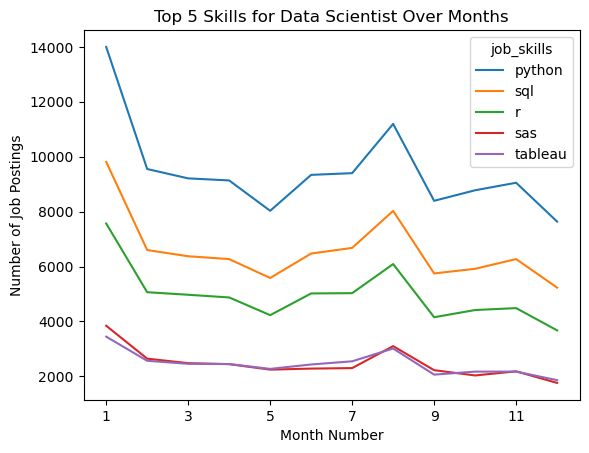

In [27]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Scientist Over Months')
plt.xlabel('Month Number')
plt.ylabel('Number of Job Postings')
plt.show()

In [28]:

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
Feb,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
Mar,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
Apr,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
May,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
Jun,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
Jul,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
Aug,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
Sep,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


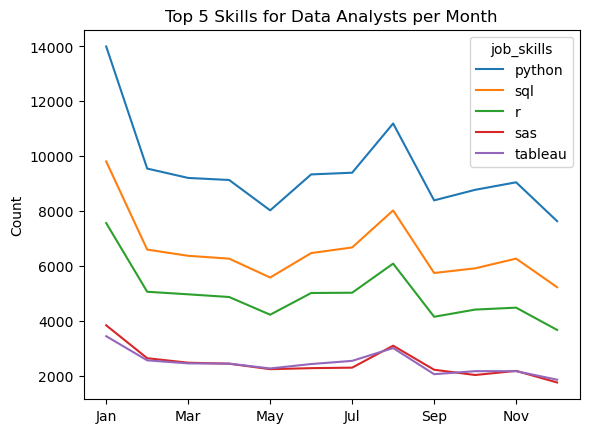

In [ ]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()